In [64]:
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# _sleepData.json'
def build_sleep_data(file_name):
    """
    Take in ...sleepData.json file and output pandas
    Input:
        file_name | str
            _sleepData file
    Output
        sleep_pd | pdf
            pandas dataframe of sleep data
    """

    with open(file_name) as file:
        j = json.load(file)

    # These are must-have feautres for sleep sesh to count
    sleep_start = []
    sleep_end = []
    date = []

    for i in range(len(j)):
        sesh = j[i]
        sleep_start.append(pd.Timestamp(sesh['sleepStartTimestampGMT']))
        sleep_end.append(pd.Timestamp(sesh['sleepEndTimestampGMT']))
        date.append(sesh['calendarDate'])

    sleep_pd = pd.DataFrame({"startTimeGmt":sleep_start,"endTimeGmt":sleep_end,"date":date})

    # There are metrics that could be dropped by snapshot
    # hence the double loop
    sleep_pd['sleepWindowConfirmationType'] = np.nan
    sleep_pd['deepSleepSeconds'] = np.nan
    sleep_pd['lightSleepSeconds'] = np.nan
    sleep_pd['remSleepSeconds'] = np.nan
    sleep_pd['awakeSleepSeconds'] = np.nan
    sleep_pd['unmeasurableSeconds'] = np.nan
    sleep_pd['averageRespiration'] = np.nan
    sleep_pd['lowestRespiration'] = np.nan
    sleep_pd['highestRespiration'] = np.nan
    sleep_pd['retro'] = np.nan
    sleep_pd['awakeCount'] = np.nan
    sleep_pd['avgSleepStress'] = np.nan

    sleep_pd['overallScore'] = np.nan
    sleep_pd['qualityScore'] = np.nan
    sleep_pd['durationScore'] = np.nan
    sleep_pd['recoveryScore'] = np.nan
    sleep_pd['deepScore'] = np.nan
    sleep_pd['lightScore'] = np.nan
    sleep_pd['awakeningsCountScore'] = np.nan
    sleep_pd['awakeTimeScore'] = np.nan
    sleep_pd['combinedAwakeScore'] = np.nan
    sleep_pd['restfulnessScore'] = np.nan
    sleep_pd['feedback'] = np.nan
    sleep_pd['insight'] = np.nan

    for i in range(len(j)):
        sesh = j[i]
        for key, value in sesh.items():
            # Already good
            if key in ['sleepStartTimestampGMT','sleepEndTimestampGMT','calendarDate']:
                continue
            # Sleep Scores
            elif key == 'sleepScores':
                for sleep_key, score in sesh[key].items():
                    sleep_pd.loc[i,sleep_key] = score
            elif key in sleep_pd.columns:
                sleep_pd.loc[i,key] = value
            else:
                raise Exception(f"Adam didn't account for {key} metric in snapshot! Let him know!!")


    # Rename bc I hate this column phrasing
    sleep_pd = sleep_pd.rename(columns= {"averageRespiration":"respirationAvg",
                                "lowestRespiration":"respirationMin",
                                "highestRespiration":"respirationMax"})
    return(sleep_pd)

In [3]:
test = build_sleep_data('2022-09-02_2022-12-11_3727308_sleepData.json')

In [4]:
test

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,respirationAvg,...,durationScore,recoveryScore,deepScore,lightScore,awakeningsCountScore,awakeTimeScore,combinedAwakeScore,restfulnessScore,feedback,insight
0,2022-09-01 21:18:00,2022-09-02 05:55:00,2022-09-02,AUTO_CONFIRMED_FINAL,14880.0,15960.0,NaN,180.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-03 01:05:00,2022-09-03 07:27:00,2022-09-03,AUTO_CONFIRMED_FINAL,9120.0,12780.0,NaN,1020.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-03 23:34:00,2022-09-04 07:33:00,2022-09-04,AUTO_CONFIRMED_FINAL,13920.0,14220.0,NaN,600.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-04 22:52:00,2022-09-05 06:04:00,2022-09-05,AUTO_CONFIRMED_FINAL,14700.0,11040.0,NaN,180.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-05 22:50:00,2022-09-06 06:18:00,2022-09-06,AUTO_CONFIRMED_FINAL,14280.0,11760.0,NaN,840.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,NaN,1020.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,NaN,420.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cwd = os.getcwd()

In [6]:
path_to_json = cwd
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [7]:
df_all = pd.DataFrame()
for i in json_files:
    df = build_sleep_data(i)
    df_all = pd.concat([df_all, df], axis = 0)

In [8]:
df_all

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,respirationAvg,...,durationScore,recoveryScore,deepScore,lightScore,awakeningsCountScore,awakeTimeScore,combinedAwakeScore,restfulnessScore,feedback,insight
0,2019-04-29 22:30:00,2019-04-30 05:35:00,2019-04-30,UNCONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-30 21:22:00,2019-05-01 07:21:00,2019-05-01,OFF_WRIST,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-05-02 01:59:00,2019-05-02 08:52:00,2019-05-02,OFF_WRIST,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-05-02 22:30:00,2019-05-03 05:35:00,2019-05-03,UNCONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,NaN,360.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,NaN,1020.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,NaN,420.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_all = df_all.sort_values(by = 'startTimeGmt')

In [10]:
df_all.columns

Index(['startTimeGmt', 'endTimeGmt', 'date', 'sleepWindowConfirmationType',
       'deepSleepSeconds', 'lightSleepSeconds', 'remSleepSeconds',
       'awakeSleepSeconds', 'unmeasurableSeconds', 'respirationAvg',
       'respirationMin', 'respirationMax', 'retro', 'awakeCount',
       'avgSleepStress', 'overallScore', 'qualityScore', 'durationScore',
       'recoveryScore', 'deepScore', 'lightScore', 'awakeningsCountScore',
       'awakeTimeScore', 'combinedAwakeScore', 'restfulnessScore', 'feedback',
       'insight'],
      dtype='object')

In [11]:
df_all.dtypes

startTimeGmt                   datetime64[ns]
endTimeGmt                     datetime64[ns]
date                                   object
sleepWindowConfirmationType            object
deepSleepSeconds                      float64
lightSleepSeconds                     float64
remSleepSeconds                       float64
awakeSleepSeconds                     float64
unmeasurableSeconds                   float64
respirationAvg                        float64
respirationMin                        float64
respirationMax                        float64
retro                                  object
awakeCount                            float64
avgSleepStress                        float64
overallScore                          float64
qualityScore                          float64
durationScore                         float64
recoveryScore                         float64
deepScore                             float64
lightScore                            float64
awakeningsCountScore              

In [12]:
df_subset = df_all.dropna(axis = 1, how = 'all')

In [13]:
df_subset

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro
0,2019-04-29 22:30:00,2019-04-30 05:35:00,2019-04-30,UNCONFIRMED,NaN,NaN,NaN,NaN,False
1,2019-04-30 21:22:00,2019-05-01 07:21:00,2019-05-01,OFF_WRIST,0.0,0.0,0.0,0.0,False
2,2019-05-02 01:59:00,2019-05-02 08:52:00,2019-05-02,OFF_WRIST,0.0,0.0,0.0,0.0,False
3,2019-05-02 22:30:00,2019-05-03 05:35:00,2019-05-03,UNCONFIRMED,NaN,NaN,NaN,NaN,False
4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,360.0,0.0,False
...,...,...,...,...,...,...,...,...,...
95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,1020.0,0.0,False
96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,420.0,0.0,False
97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,0.0,0.0,False
98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,0.0,0.0,False


In [14]:
df_subset = df_subset.dropna(axis = 0, how = 'any')

In [15]:
df_subset

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro
1,2019-04-30 21:22:00,2019-05-01 07:21:00,2019-05-01,OFF_WRIST,0.0,0.0,0.0,0.0,False
2,2019-05-02 01:59:00,2019-05-02 08:52:00,2019-05-02,OFF_WRIST,0.0,0.0,0.0,0.0,False
4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,360.0,0.0,False
13,2019-05-12 21:02:00,2019-05-13 07:05:00,2019-05-13,OFF_WRIST,0.0,0.0,0.0,0.0,False
14,2019-05-13 22:56:00,2019-05-14 05:43:00,2019-05-14,AUTO_CONFIRMED_FINAL,11580.0,12840.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,1020.0,0.0,False
96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,420.0,0.0,False
97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,0.0,0.0,False
98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,0.0,0.0,False


In [48]:
df_all['Year'] = pd.DatetimeIndex(df_all['date']).year

In [16]:
df_subset['sleepWindowConfirmationType'].value_counts()

OFF_WRIST               611
AUTO_CONFIRMED_FINAL    301
AUTO_CONFIRMED            7
Name: sleepWindowConfirmationType, dtype: int64

In [17]:
df_subset = df_subset[(df_subset['deepSleepSeconds'] != 0)]

In [18]:
df_subset['sleepWindowConfirmationType'].value_counts()

AUTO_CONFIRMED_FINAL    300
AUTO_CONFIRMED            7
Name: sleepWindowConfirmationType, dtype: int64

In [19]:
df_subset.dtypes

startTimeGmt                   datetime64[ns]
endTimeGmt                     datetime64[ns]
date                                   object
sleepWindowConfirmationType            object
deepSleepSeconds                      float64
lightSleepSeconds                     float64
awakeSleepSeconds                     float64
unmeasurableSeconds                   float64
retro                                  object
dtype: object

In [20]:
df_subset[df_subset.duplicated(['date'], keep=False)]

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro


In [21]:
df_subset['deepSleepHrs'] = ((df_subset['deepSleepSeconds'])/60)/60
df_subset['lightSleepHrs'] = ((df_subset['lightSleepSeconds'])/60)/60
df_subset['awakeSleepHrs'] = ((df_subset['awakeSleepSeconds'])/60)/60

C:\Users\44790\AppData\Local\Temp/ipykernel_13140/1541889732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['deepSleepHrs'] = ((df_subset['deepSleepSeconds'])/60)/60
C:\Users\44790\AppData\Local\Temp/ipykernel_13140/1541889732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['lightSleepHrs'] = ((df_subset['lightSleepSeconds'])/60)/60
C:\Users\44790\AppData\Local\Temp/ipykernel_13140/1541889732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [49]:
df_all['deepSleepHrs'] = ((df_all['deepSleepSeconds'])/60)/60
df_all['lightSleepHrs'] = ((df_all['lightSleepSeconds'])/60)/60
df_all['awakeSleepHrs'] = ((df_all['awakeSleepSeconds'])/60)/60

In [22]:
df_subset

,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,deepSleepHrs,lightSleepHrs,awakeSleepHrs
4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,360.0,0.0,False,3.450000,3.233333,0.100000
14,2019-05-13 22:56:00,2019-05-14 05:43:00,2019-05-14,AUTO_CONFIRMED_FINAL,11580.0,12840.0,0.0,0.0,False,3.216667,3.566667,0.000000
15,2019-05-14 22:56:00,2019-05-15 06:12:00,2019-05-15,AUTO_CONFIRMED_FINAL,10020.0,16140.0,0.0,0.0,False,2.783333,4.483333,0.000000
16,2019-05-15 23:22:00,2019-05-16 06:12:00,2019-05-16,AUTO_CONFIRMED_FINAL,13200.0,11400.0,0.0,0.0,False,3.666667,3.166667,0.000000
18,2019-05-17 21:44:00,2019-05-18 05:54:00,2019-05-18,AUTO_CONFIRMED_FINAL,18060.0,11040.0,300.0,0.0,False,5.016667,3.066667,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,1020.0,0.0,False,5.616667,2.300000,0.283333
96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,420.0,0.0,False,5.033333,2.483333,0.116667
97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,0.0,0.0,False,3.566667,3.666667,0.000000
98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,0.0,0.0,False,3.433333,3.733333,0.000000


In [50]:
import seaborn as sns

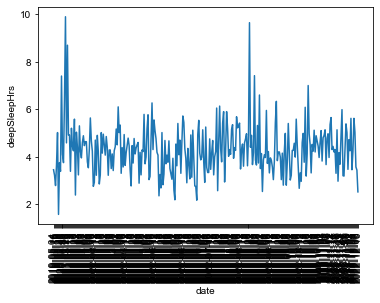

In [24]:
df_subset2 = df_subset.reset_index()
ax = sns.lineplot(data = df_subset2, x = 'date', y = 'deepSleepHrs')
sns.set(rc={'figure.figsize':(30,8.27)})
ax.tick_params(axis='x', rotation=90)

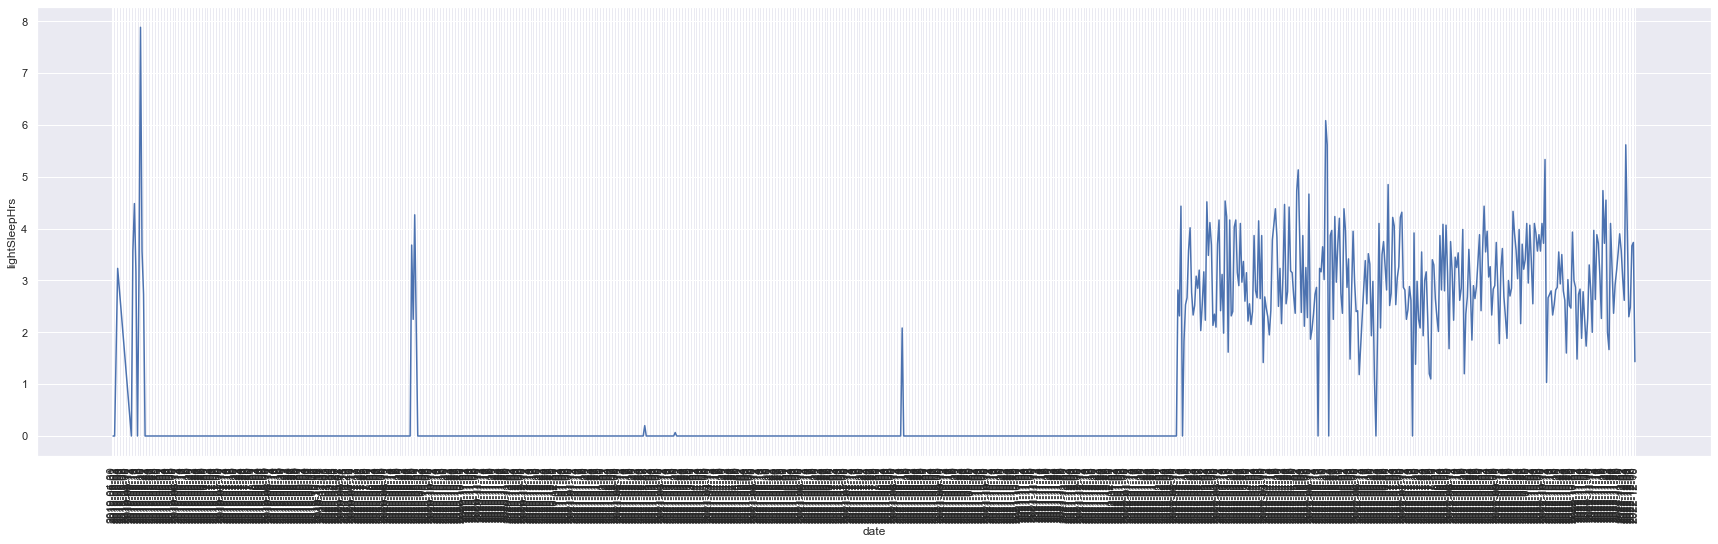

In [53]:
df_all = df_all.reset_index()
ax = sns.lineplot(data = df_all, x = 'date', y = 'lightSleepHrs')
sns.set(rc={'figure.figsize':(30,8.27)})
ax.tick_params(axis='x', rotation=90)

In [25]:
df_subset2['start_time'] = df_subset2['startTimeGmt'].dt.strftime('%H:%M')

In [26]:
df_subset2

,index,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,deepSleepHrs,lightSleepHrs,awakeSleepHrs,start_time
0,4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,360.0,0.0,False,3.450000,3.233333,0.100000,00:29
1,14,2019-05-13 22:56:00,2019-05-14 05:43:00,2019-05-14,AUTO_CONFIRMED_FINAL,11580.0,12840.0,0.0,0.0,False,3.216667,3.566667,0.000000,22:56
2,15,2019-05-14 22:56:00,2019-05-15 06:12:00,2019-05-15,AUTO_CONFIRMED_FINAL,10020.0,16140.0,0.0,0.0,False,2.783333,4.483333,0.000000,22:56
3,16,2019-05-15 23:22:00,2019-05-16 06:12:00,2019-05-16,AUTO_CONFIRMED_FINAL,13200.0,11400.0,0.0,0.0,False,3.666667,3.166667,0.000000,23:22
4,18,2019-05-17 21:44:00,2019-05-18 05:54:00,2019-05-18,AUTO_CONFIRMED_FINAL,18060.0,11040.0,300.0,0.0,False,5.016667,3.066667,0.083333,21:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,1020.0,0.0,False,5.616667,2.300000,0.283333,22:43
303,96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,420.0,0.0,False,5.033333,2.483333,0.116667,23:43
304,97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,0.0,0.0,False,3.566667,3.666667,0.000000,00:17
305,98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,0.0,0.0,False,3.433333,3.733333,0.000000,23:52


In [27]:
df_subset2['year_month'] = pd.to_datetime(df_subset2.date).dt.to_period('m')

In [28]:
df_subset2.dtypes

index                                   int64
startTimeGmt                   datetime64[ns]
endTimeGmt                     datetime64[ns]
date                                   object
sleepWindowConfirmationType            object
deepSleepSeconds                      float64
lightSleepSeconds                     float64
awakeSleepSeconds                     float64
unmeasurableSeconds                   float64
retro                                  object
deepSleepHrs                          float64
lightSleepHrs                         float64
awakeSleepHrs                         float64
start_time                             object
year_month                          period[M]
dtype: object

In [29]:
df_subset2

,index,startTimeGmt,endTimeGmt,date,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,retro,deepSleepHrs,lightSleepHrs,awakeSleepHrs,start_time,year_month
0,4,2019-05-04 00:29:00,2019-05-04 07:16:00,2019-05-04,AUTO_CONFIRMED_FINAL,12420.0,11640.0,360.0,0.0,False,3.450000,3.233333,0.100000,00:29,2019-05
1,14,2019-05-13 22:56:00,2019-05-14 05:43:00,2019-05-14,AUTO_CONFIRMED_FINAL,11580.0,12840.0,0.0,0.0,False,3.216667,3.566667,0.000000,22:56,2019-05
2,15,2019-05-14 22:56:00,2019-05-15 06:12:00,2019-05-15,AUTO_CONFIRMED_FINAL,10020.0,16140.0,0.0,0.0,False,2.783333,4.483333,0.000000,22:56,2019-05
3,16,2019-05-15 23:22:00,2019-05-16 06:12:00,2019-05-16,AUTO_CONFIRMED_FINAL,13200.0,11400.0,0.0,0.0,False,3.666667,3.166667,0.000000,23:22,2019-05
4,18,2019-05-17 21:44:00,2019-05-18 05:54:00,2019-05-18,AUTO_CONFIRMED_FINAL,18060.0,11040.0,300.0,0.0,False,5.016667,3.066667,0.083333,21:44,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,95,2022-12-05 22:43:00,2022-12-06 06:55:00,2022-12-06,AUTO_CONFIRMED_FINAL,20220.0,8280.0,1020.0,0.0,False,5.616667,2.300000,0.283333,22:43,2022-12
303,96,2022-12-06 23:43:00,2022-12-07 07:21:00,2022-12-07,AUTO_CONFIRMED_FINAL,18120.0,8940.0,420.0,0.0,False,5.033333,2.483333,0.116667,23:43,2022-12
304,97,2022-12-08 00:17:00,2022-12-08 07:31:00,2022-12-08,AUTO_CONFIRMED_FINAL,12840.0,13200.0,0.0,0.0,False,3.566667,3.666667,0.000000,00:17,2022-12
305,98,2022-12-08 23:52:00,2022-12-09 07:02:00,2022-12-09,AUTO_CONFIRMED_FINAL,12360.0,13440.0,0.0,0.0,False,3.433333,3.733333,0.000000,23:52,2022-12


<AxesSubplot:xlabel='year_month', ylabel='deepSleepHrs'>

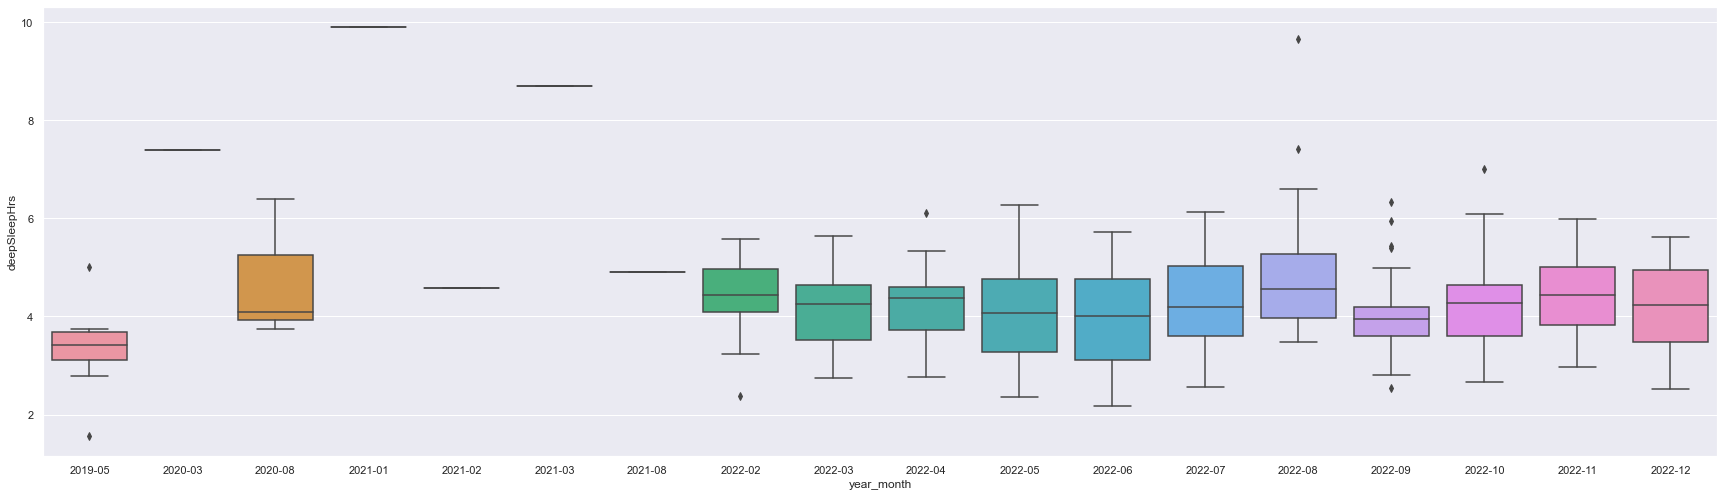

In [30]:
sns.boxplot(data = df_subset2, x = 'year_month', y = 'deepSleepHrs')

In [31]:
df_subset2_melted = pd.melt(df_subset2, id_vars=['date'], value_vars=['deepSleepHrs', 'lightSleepHrs', 'awakeSleepHrs'])

In [58]:
deep_gp = df_subset2.groupby(['year_month'])['deepSleepHrs'].mean().to_frame()
light_gp = df_subset2.groupby(['year_month'])['lightSleepHrs'].mean().to_frame()
awake_gp = df_subset2.groupby(['year_month'])['awakeSleepHrs'].mean().to_frame()
combined_gp = deep_gp.join(light_gp).join(awake_gp)


In [61]:
combined_gp = combined_gp.reset_index()
combined_gp

,year_month,deepSleepHrs,lightSleepHrs,awakeSleepHrs
0,2019-05,3.354167,3.962500,0.054167
1,2020-03,7.400000,0.000000,0.000000
2,2020-08,4.750000,3.400000,0.044444
3,2021-01,9.900000,0.000000,0.000000
4,2021-02,4.583333,0.200000,0.116667
5,2021-03,8.700000,0.066667,0.000000
6,2021-08,4.916667,2.083333,0.183333
7,2022-02,4.385556,2.865556,0.311111
8,2022-03,4.118817,3.149462,0.201075
9,2022-04,4.268966,2.986207,0.145402


<AxesSubplot:xlabel='year_month', ylabel='Hours'>

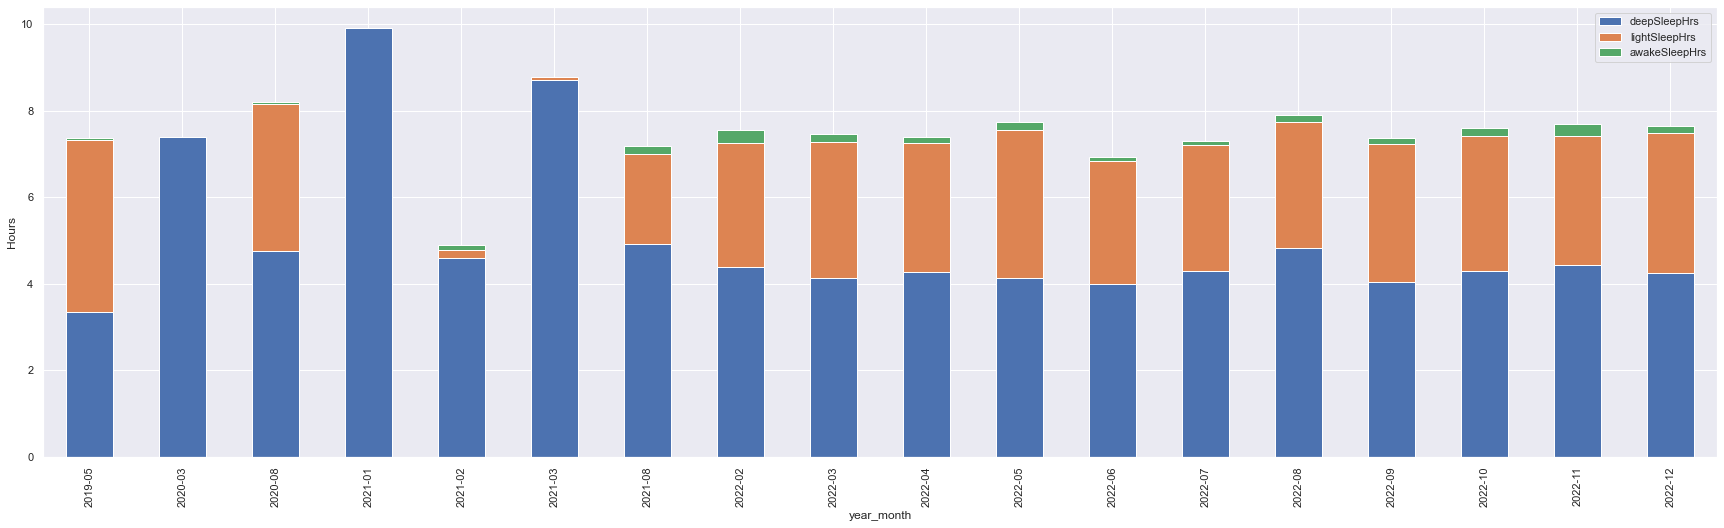

In [69]:
combined_gp.plot(x = 'year_month', kind = 'bar', stacked = True, ylabel = 'Hours')

In [32]:
df_subset2_melted

,date,variable,value
0,2019-05-04,deepSleepHrs,3.450000
1,2019-05-14,deepSleepHrs,3.216667
2,2019-05-15,deepSleepHrs,2.783333
3,2019-05-16,deepSleepHrs,3.666667
4,2019-05-18,deepSleepHrs,5.016667
...,...,...,...
916,2022-12-06,awakeSleepHrs,0.283333
917,2022-12-07,awakeSleepHrs,0.116667
918,2022-12-08,awakeSleepHrs,0.000000
919,2022-12-09,awakeSleepHrs,0.000000


<AxesSubplot:xlabel='date', ylabel='value'>

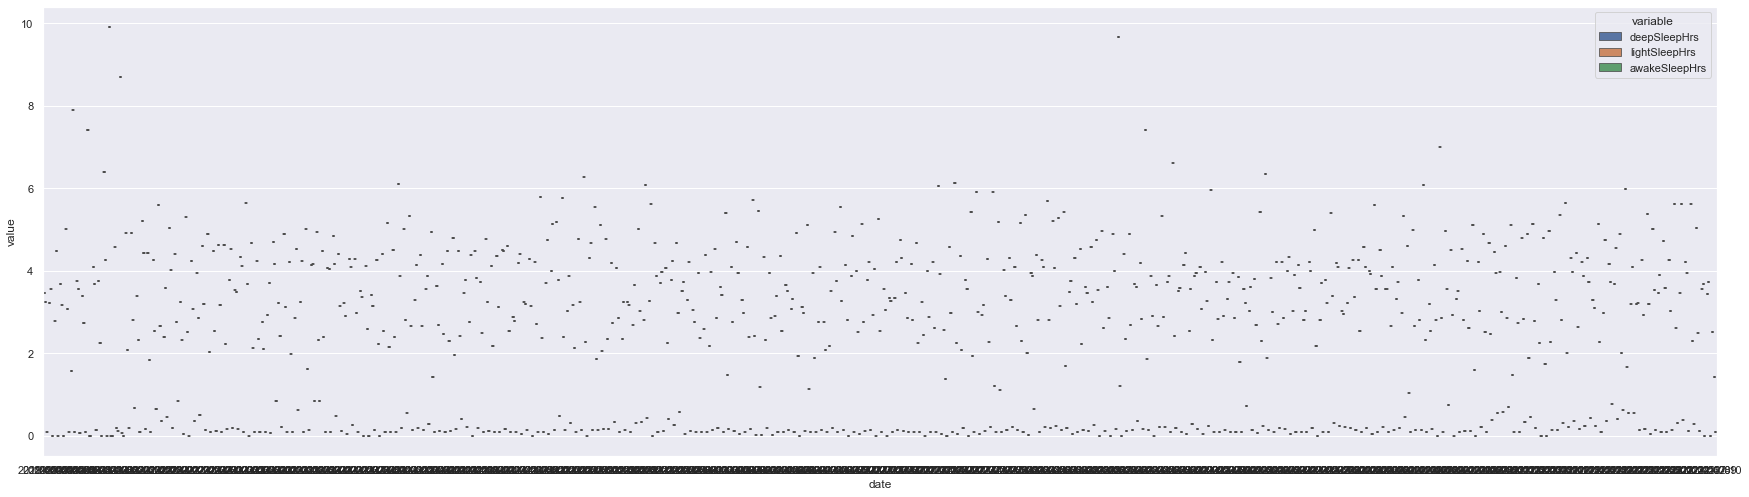

In [54]:
sns.boxplot(data = df_subset2_melted, x = 'date', y = 'value', hue = 'variable')